In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [19]:
def ldaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmat - A single d x d learnt covariance matrix 
    
    # IMPLEMENT THIS METHOD 
    d = X.shape[1]
    y_size = y.size
    y_class = y.reshape(y_size)
    y_uclass = np.unique(y_class)
    y_uclass_size = y_uclass.size
    means = np.zeros((d,y_uclass_size))
    #print(means)

    for i in range(y_uclass_size):
        means[:,i] = np.mean(X[y_class == y_uclass[i]],axis=0)

    print("Means ", means)
    covmat = np.cov(X,rowvar=0)
    #covmat code if needed
    print("CovMat ", covmat)

    return means,covmat

In [17]:
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')


In [20]:
means,covmat = ldaLearn(X,y)

Means  [[  2.84353732   6.06321127   4.22278151  11.00791698   9.72829148]
 [  3.22948323   8.19216551  11.96673625   4.70430105  11.82494404]]
CovMat  [[ 10.85927241   1.22704893]
 [  1.22704893  14.32283255]]


In [48]:
def ldaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD


    invcovmat = np.linalg.inv(covmats)
    print("N : ", Xtest.shape[0])
    print("Class : ", means.shape[1])
    y_prob = np.zeros((Xtest.shape[0],means.shape[1]))
    n_class = means.shape[1]

    for i in range(n_class):
        t1 = Xtest - means[:,i]
        #print("T1 ",t1)
        #print("invcovmat ",invcovmat)
        t2 = np.dot(t1,invcovmat)
        t3 = np.sum(t2 * t1,1)
        t4 = np.exp(-0.5*t3)

        y_prob[:,i] = t4

    #print(y_prob)
    ypred = np.argmax(y_prob,1) + 1
    print("ypred ", ypred)

    ytest = ytest.reshape(ytest.size)
    print("ytest ", ytest)
    acc = 100 * np.mean(ytest == ypred)

    return acc,ypred

In [49]:
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))

Means  [[  2.84353732   6.06321127   4.22278151  11.00791698   9.72829148]
 [  3.22948323   8.19216551  11.96673625   4.70430105  11.82494404]]
CovMat  [[ 10.85927241   1.22704893]
 [  1.22704893  14.32283255]]
N :  100
Class :  5
ypred  [2 2 3 4 3 2 5 4 4 4 3 5 2 2 4 1 1 1 5 3 5 1 4 3 5 1 1 2 5 2 5 5 3 5 3 4 2
 3 1 2 4 5 1 1 4 4 5 3 5 5 5 4 1 5 4 4 1 3 3 1 1 4 5 3 5 4 2 3 3 3 5 2 2 1
 4 4 4 1 1 4 1 3 4 5 3 4 3 3 3 2 5 1 5 2 5 4 4 5 5 1]
ytest  [ 2.  2.  3.  4.  3.  5.  5.  4.  4.  4.  3.  5.  2.  2.  4.  1.  1.  1.
  5.  3.  5.  1.  4.  3.  5.  1.  1.  2.  5.  2.  5.  5.  3.  5.  3.  4.
  2.  3.  1.  2.  4.  5.  1.  1.  4.  4.  5.  3.  5.  5.  5.  4.  1.  5.
  4.  4.  1.  3.  3.  1.  1.  4.  5.  3.  5.  4.  4.  3.  3.  3.  5.  2.
  2.  1.  4.  4.  4.  1.  1.  4.  1.  3.  4.  5.  3.  4.  3.  3.  3.  3.
  5.  1.  5.  2.  5.  4.  4.  5.  5.  1.]
LDA Accuracy = 97.0


In [56]:
def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    d = X.shape[1]
    y_size = y.size
    y_class = y.reshape(y_size)
    y_uclass = np.unique(y_class)
    y_uclass_size = y_uclass.size
    means = np.zeros((d,y_uclass_size))
    covmats = [np.zeros((d,d))]*y_uclass_size

    for i in range(y_uclass_size):
        means[:,i] = np.mean(X[y_class == y_uclass[i]],axis=0)
        covmats[i] = np.cov(X[y_class == y_uclass[i]],rowvar=0)

    return means,covmats

In [57]:
def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # IMPLEMENT THIS METHOD
    

    print("N : ", Xtest.shape[0])
    print("Class : ", means.shape[1])
    y_prob = np.zeros((Xtest.shape[0],means.shape[1]))
    n_class = means.shape[1]

    for i in range(n_class):
        invcovmat = np.linalg.inv(covmats[i])
        t1 = Xtest - means[:,i]
        #print("T1 ",t1)
        #print("invcovmat ",invcovmat)
        t2 = np.dot(t1,invcovmat)
        t3 = np.sum(t2 * t1,1)
        t4 = np.exp(-0.5*t3)

        y_prob[:,i] = t4

    #print(y_prob)
    ypred = np.argmax(y_prob,1) + 1
    print("ypred ", ypred)

    ytest = ytest.reshape(ytest.size)
    print("ytest ", ytest)
    acc = 100 * np.mean(ytest == ypred)


    return acc,ypred

In [58]:
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

N :  100
Class :  5
ypred  [2 2 3 4 3 2 5 4 4 4 3 5 2 2 4 1 1 1 5 3 5 1 4 3 5 1 1 2 5 2 5 5 3 5 3 4 2
 3 1 2 4 5 2 1 4 4 5 3 5 5 5 4 1 5 4 4 2 3 3 1 1 4 5 3 5 4 2 3 3 3 5 2 2 1
 4 4 4 1 1 4 1 3 4 5 2 4 3 3 3 2 5 1 5 2 5 4 4 5 5 1]
ytest  [ 2.  2.  3.  4.  3.  5.  5.  4.  4.  4.  3.  5.  2.  2.  4.  1.  1.  1.
  5.  3.  5.  1.  4.  3.  5.  1.  1.  2.  5.  2.  5.  5.  3.  5.  3.  4.
  2.  3.  1.  2.  4.  5.  1.  1.  4.  4.  5.  3.  5.  5.  5.  4.  1.  5.
  4.  4.  1.  3.  3.  1.  1.  4.  5.  3.  5.  4.  4.  3.  3.  3.  5.  2.
  2.  1.  4.  4.  4.  1.  1.  4.  1.  3.  4.  5.  3.  4.  3.  3.  3.  3.
  5.  1.  5.  2.  5.  4.  4.  5.  5.  1.]
QDA Accuracy = 94.0


In [61]:
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()



N :  10000
Class :  5
ypred  [1 1 1 ..., 5 5 5]
ytest  [ 0.  0.  0. ...,  0.  0.  0.]


Text(0.5,1,'LDA')

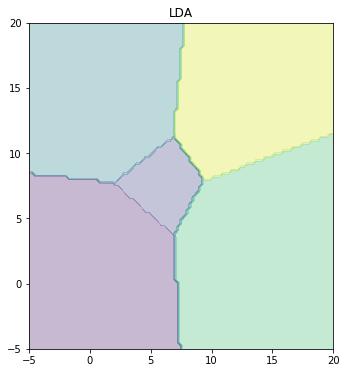

In [70]:
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
#plt.scatter(Xtest[:,0],Xtest[:,1],c= ytest)
plt.title('LDA')






Means  [[  2.84353732   6.06321127   4.22278151  11.00791698   9.72829148]
 [  3.22948323   8.19216551  11.96673625   4.70430105  11.82494404]]
CovMat  [[ 10.85927241   1.22704893]
 [  1.22704893  14.32283255]]
N :  100
Class :  5
ypred  [2 2 3 4 3 2 5 4 4 4 3 5 2 2 4 1 1 1 5 3 5 1 4 3 5 1 1 2 5 2 5 5 3 5 3 4 2
 3 1 2 4 5 1 1 4 4 5 3 5 5 5 4 1 5 4 4 1 3 3 1 1 4 5 3 5 4 2 3 3 3 5 2 2 1
 4 4 4 1 1 4 1 3 4 5 3 4 3 3 3 2 5 1 5 2 5 4 4 5 5 1]
ytest  [ 2.  2.  3.  4.  3.  5.  5.  4.  4.  4.  3.  5.  2.  2.  4.  1.  1.  1.
  5.  3.  5.  1.  4.  3.  5.  1.  1.  2.  5.  2.  5.  5.  3.  5.  3.  4.
  2.  3.  1.  2.  4.  5.  1.  1.  4.  4.  5.  3.  5.  5.  5.  4.  1.  5.
  4.  4.  1.  3.  3.  1.  1.  4.  5.  3.  5.  4.  4.  3.  3.  3.  5.  2.
  2.  1.  4.  4.  4.  1.  1.  4.  1.  3.  4.  5.  3.  4.  3.  3.  3.  3.
  5.  1.  5.  2.  5.  4.  4.  5.  5.  1.]
LDA Accuracy = 97.0
N :  100
Class :  5
ypred  [2 2 3 4 3 2 5 4 4 4 3 5 2 2 4 1 1 1 5 3 5 1 4 3 5 1 1 2 5 2 5 5 3 5 3 4 2
 3 1 2 4 5 2 1 4 4 5 3

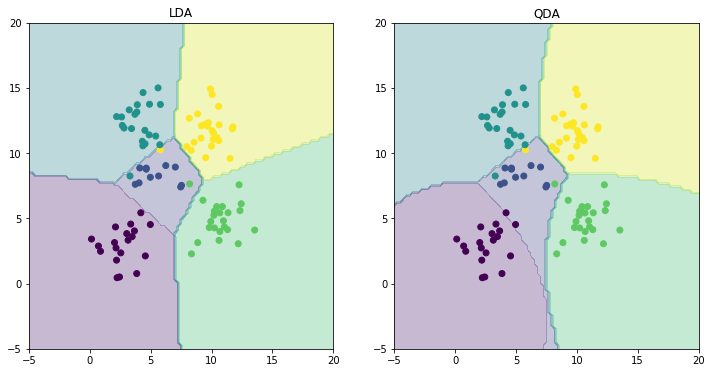

In [74]:
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
# QDA
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
#print(ytest)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('LDA')


plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('QDA')

plt.show()


In [123]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
                                                  
    d = X.shape[1]
    x_trans = np.transpose(X)
    w = np.dot(np.linalg.inv(np.dot(x_trans,X)),np.dot(x_trans,y))  
    #print("W",w)

    # IMPLEMENT THIS METHOD                                                   
    return w

In [137]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse

    ypred = np.dot(Xtest,w)

    t1 = np.subtract(ytest,ypred)
    t2 = np.multiply(t1,t1)
    t3 = np.sum(t2)
    #t3 = np.sqrt(t3)
    mse = t3/Xtest.shape[0]
    # IMPLEMENT THIS METHOD
    return mse

In [138]:
# Problem 2
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))


W [[ -4.12173302e+02]
 [ -3.45940349e+02]
 [  5.78814085e+02]
 [  5.89243805e+01]
 [ -1.35891612e+06]
 [  1.19462263e+06]
 [  5.07036456e+05]
 [ -1.34586972e+03]
 [  4.47713282e+05]
 [  4.77903799e+02]
 [ -1.40658376e+02]
 [ -9.19340329e+02]
 [ -3.95968904e+02]
 [ -7.25692639e+04]
 [ -8.95093664e+04]
 [ -3.23782607e+03]
 [  1.40730022e+03]
 [  3.91795186e+04]
 [  2.65084262e+02]
 [  5.12843509e+02]
 [  2.01158086e+02]
 [  6.99140521e+01]
 [ -4.24307012e+03]
 [  3.44644877e+03]
 [  2.22399630e+03]
 [ -1.77734526e+02]
 [  1.58033897e+03]
 [  1.08315565e+02]
 [  2.47108215e+02]
 [ -2.38458154e+01]
 [  7.93875959e+02]
 [  2.96369202e+02]
 [ -6.06952737e+02]
 [ -5.63192652e+02]
 [ -5.48068268e+02]
 [  9.69932251e+01]
 [  5.90070172e+02]
 [ -1.34356078e+03]
 [  2.32884509e+03]
 [ -1.59023051e+02]
 [ -7.56384888e+02]
 [  4.36008445e+02]
 [ -2.45555655e+02]
 [ -8.74482672e+03]
 [  7.02634079e+03]
 [  3.62258437e+03]
 [  5.78813898e+02]
 [  3.31947790e+03]
 [ -2.39954611e+02]
 [  1.58217349e+05

In [139]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1


    # IMPLEMENT THIS METHOD  
    d = X.shape[1]
    N = X.shape[0]
    x_trans = np.transpose(X)
    w = np.dot(np.linalg.inv((np.dot(x_trans,X))+lambd*N*np.identity(d)),np.dot(x_trans,y)) 

    return w

2885.13296158
0.0001 1000
[ 3707.84018117] 0.0


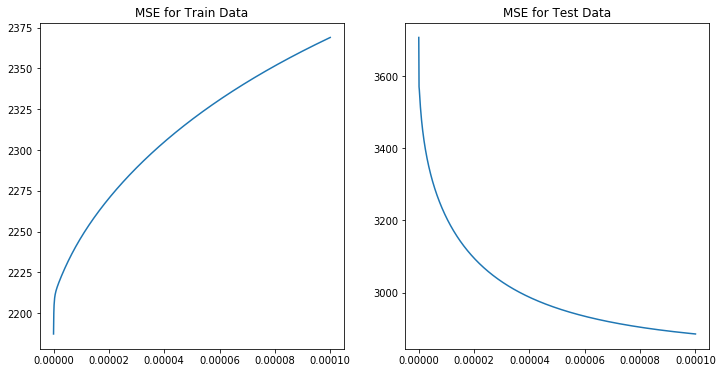

In [145]:
# Problem 3
k = 1001
lambdas = np.linspace(0, .0001, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
print(np.min(mses3))
print(lambdas[np.argmin(mses3)],np.argmin(mses3))
print(mses3[0],lambdas[0])

In [141]:
def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
    # IMPLEMENT THIS METHOD
    Xp = np.ones((x.shape[0],p+1))
    for i in range(1,p+1):
        Xp[:,i] = x**i
    return Xp

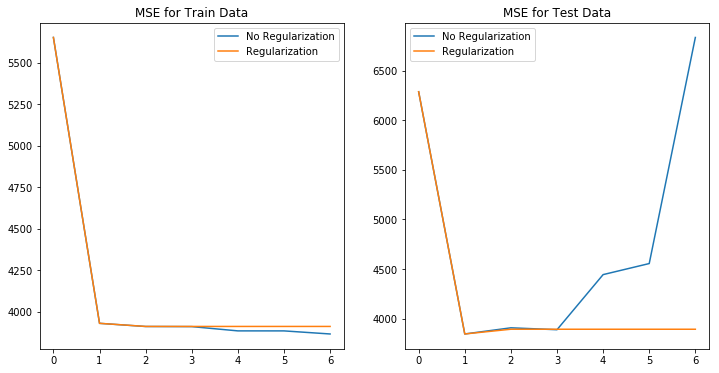

[[ 5650.7105389   5650.71053892]
 [ 3930.91540732  3930.91583685]
 [ 3911.8396712   3912.23135526]
 [ 3911.18866493  3912.22189655]
 [ 3885.47306811  3912.21894131]
 [ 3885.4071574   3912.21892732]
 [ 3866.88344945  3912.21892659]]


In [146]:
pmax = 7
lambda_opt = .00001 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()
print(mses5_train)